# Introduction 

In the following notebook, I will preparing the 2020_0505_Cleaned_Weather_Features.csv for forecasting temperature in Spain

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [60]:
import numpy as np
import pandas as pd
from IPython.display import Image

import matplotlib.pyplot as plt
import warnings

**Set notebook preferences**

In [61]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

#Font dictionary for plot titles and labels
font_title = {'fontsize' : 24, 
              'style':'italic',
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

font_label = {'fontsize' : 16, 
              'style':'italic',
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

#Set path to save visualizations
viz_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\Data_Processing\Price_Data'

#Set path to read in visuals from EDA
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\Exploratory_Data_Analysis\Price'

#Raw data plot
#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [62]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0514_Weather_Energy.csv', parse_dates=['date_time'], index_col='date_time')

#Drop columns not pertaining to price
df = df[['price','price_forecast','load','temp']]

# Data Overview

**Data Dictionary**

* **date_time**: Datetime index localized to CET
* **price**: hourly price EUR/MWh
* **price_forecast**: forecasted hourly price EUR/MWh
* **load**: actual electrical demand MWh
* **temp**: hourly temperature(F) in Spain

**Data Preview**

In [63]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (35072, 4)


,price,price_forecast,load,temp
date_time,,,,
2015-01-01 00:00:00,65.41,50.10,25385.0,30.814633
2015-01-01 01:00:00,64.92,48.10,24382.0,30.852860
2015-01-01 02:00:00,64.48,47.33,22734.0,30.108448
2015-01-01 03:00:00,59.32,42.27,21286.0,30.091044
2015-01-01 04:00:00,56.04,38.41,20264.0,30.192620


**About the data**

In [64]:
print('Data set stats and info:\n{}\n'.format(df.describe()))
print('Variance\n{}\n'.format(np.var(df)))
print(df.info())

Data set stats and info:
              price  price_forecast          load          temp
count  35072.000000    35072.000000  35072.000000  35072.000000
mean      57.883167       49.873182  28695.654824     61.752442
std       14.202675       14.617667   4577.180735     13.069191
min        9.330000        2.060000  18041.000000     29.825352
25%       49.350000       41.490000  24805.000000     51.638000
50%       58.020000       50.520000  28901.000000     60.573200
75%       68.010000       60.530000  32194.000000     71.479400
max      116.800000      101.990000  41015.000000     97.008800

Variance
price             2.017102e+02
price_forecast    2.136701e+02
load              2.094999e+07
temp              1.707989e+02
dtype: float64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35072 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price      

# Quick EDA

**Raw Timeplot**

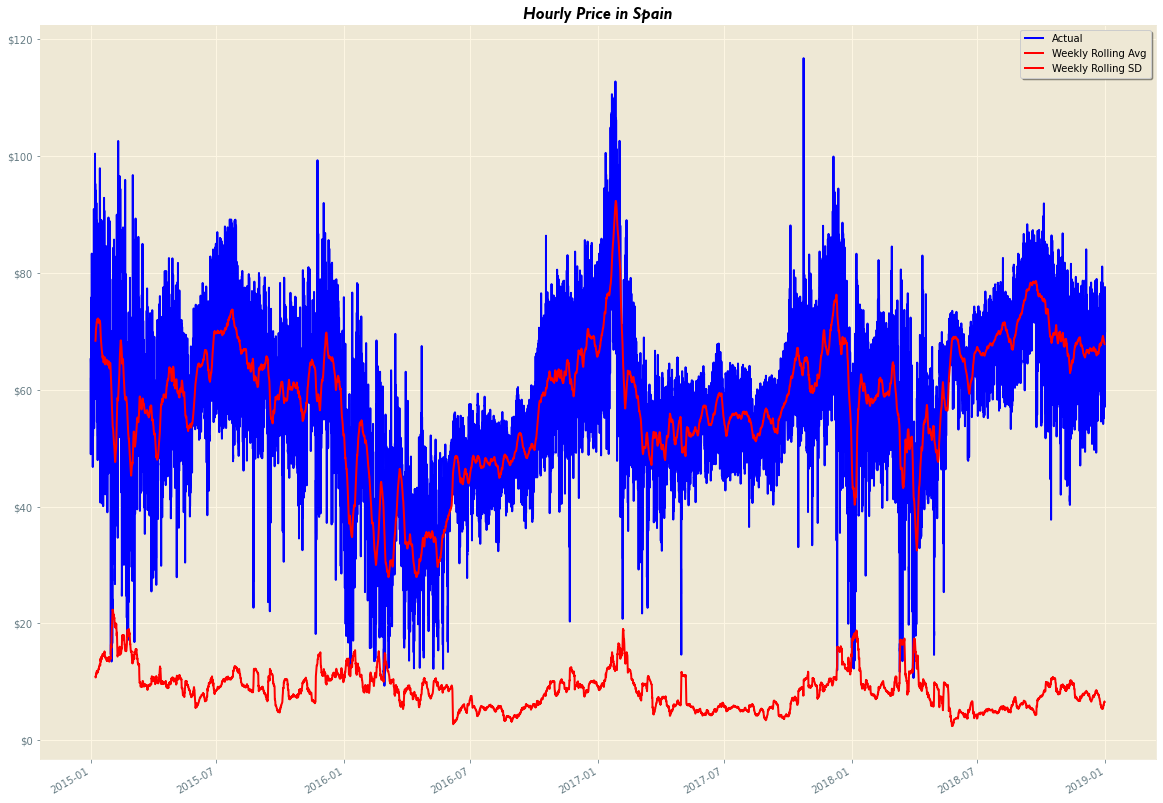

In [65]:
#Raw data plot
Image(filename = eda_path + "/Hourly_Price.png", width=1000, height=500,unconfined=True)

**Correlation Matrix**

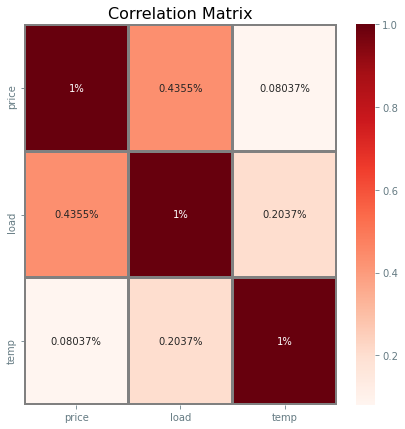

In [66]:
Image(filename = eda_path + "/Correlation_Matrix.png", width=500, height=500,unconfined=True)

**Scatter plot**

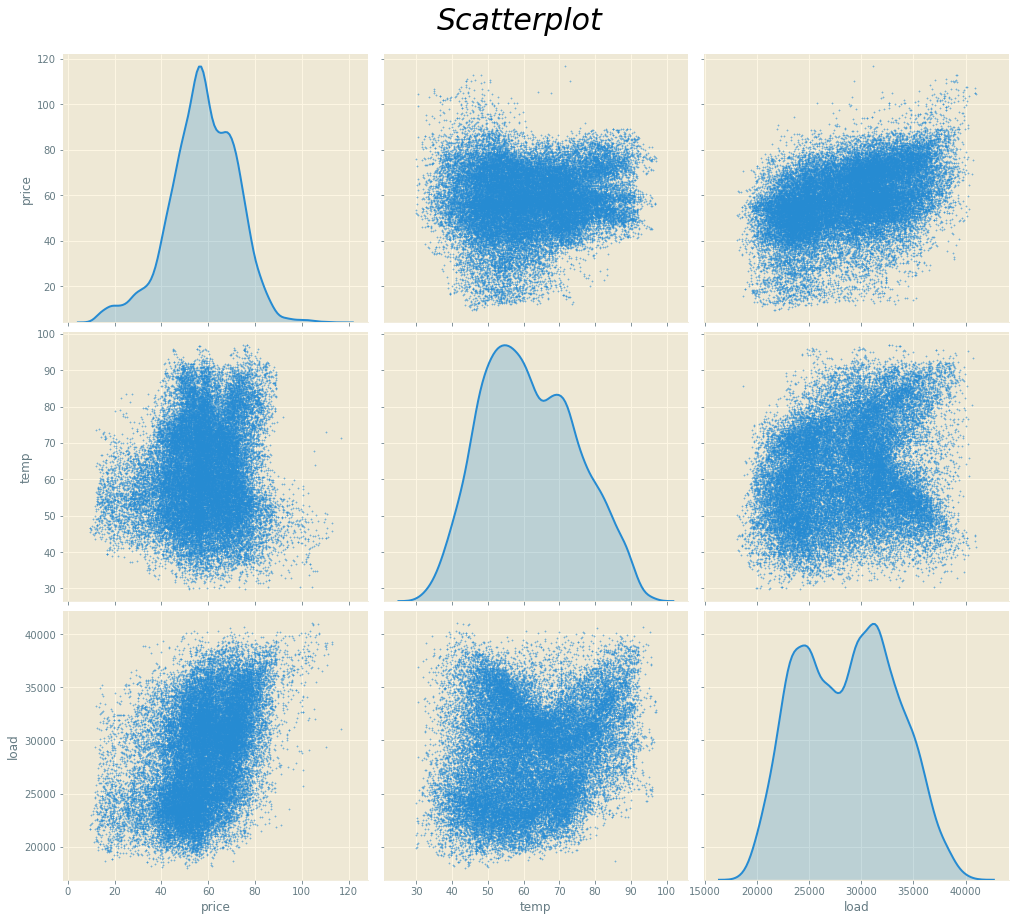

In [67]:
Image(filename = eda_path + "/Scatter_plot.png", width=500, height=500,unconfined=True)

**Autocorrelation plots**

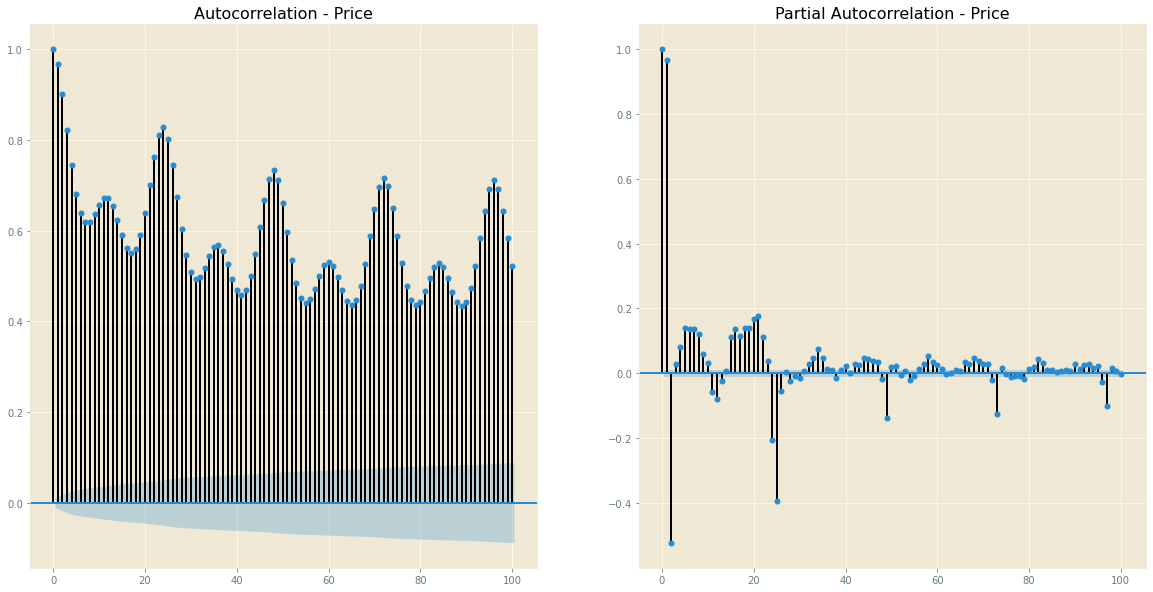

In [68]:
Image(filename = eda_path+ "/ACF_PACF_Price.png", width=1000, height=500,unconfined=True)

**Decomposition Model**

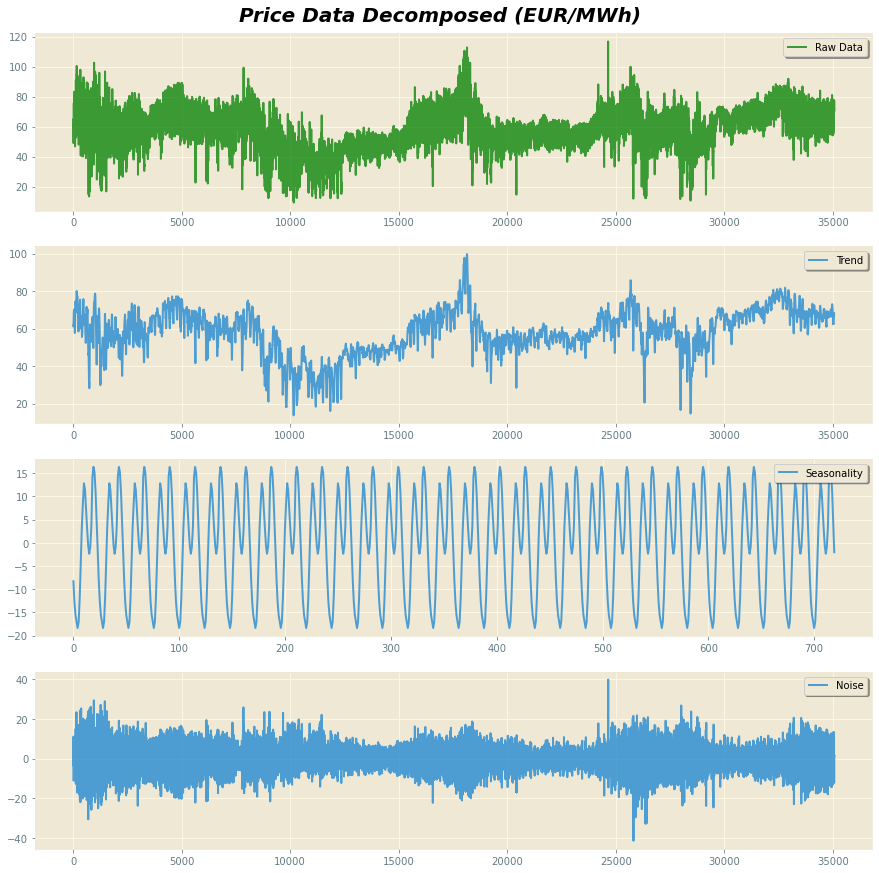

In [69]:
#Raw data Decomposition
Image(filename = eda_path + "/Price_Decomposition.png", width=800, height=500,unconfined=True)

# Feature Engineering

# Preprocessing

**Zoomed in version of our price data**

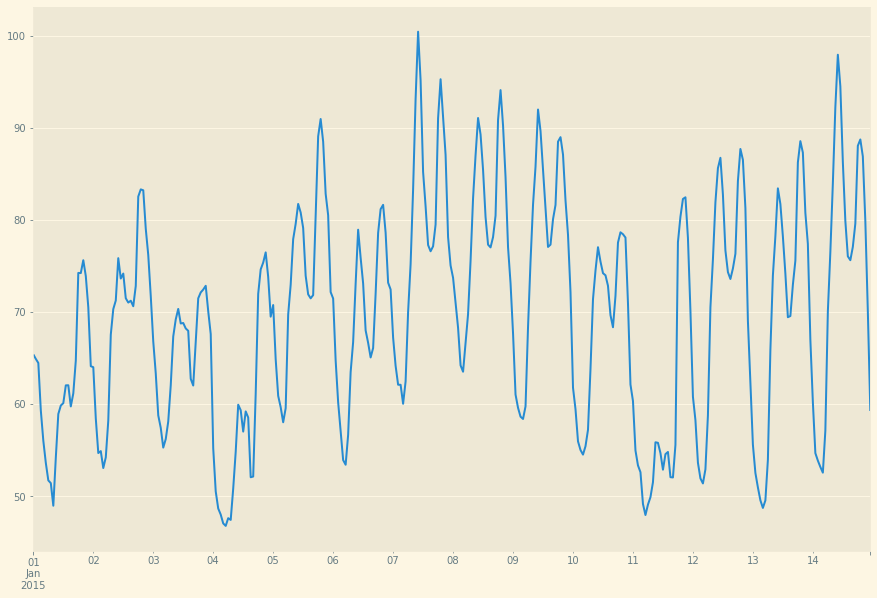

In [70]:
#Read in timeplotter
from TimeseriesPlotter import timeseries_plot

#Set figure
f,ax = plt.subplots(figsize = (15,10))
#Zoom in on price data

timeseries_plot(df.price[:24*2*7], ax=ax)

**Stationarize data - Price**

In [71]:
#Deseason price_actual
df['deseasoned_price'] = df['price'].diff(24)
df['deseasoned_price2'] = df['deseasoned_price'].diff(24*7)

In [72]:
df.dropna(inplace=True)

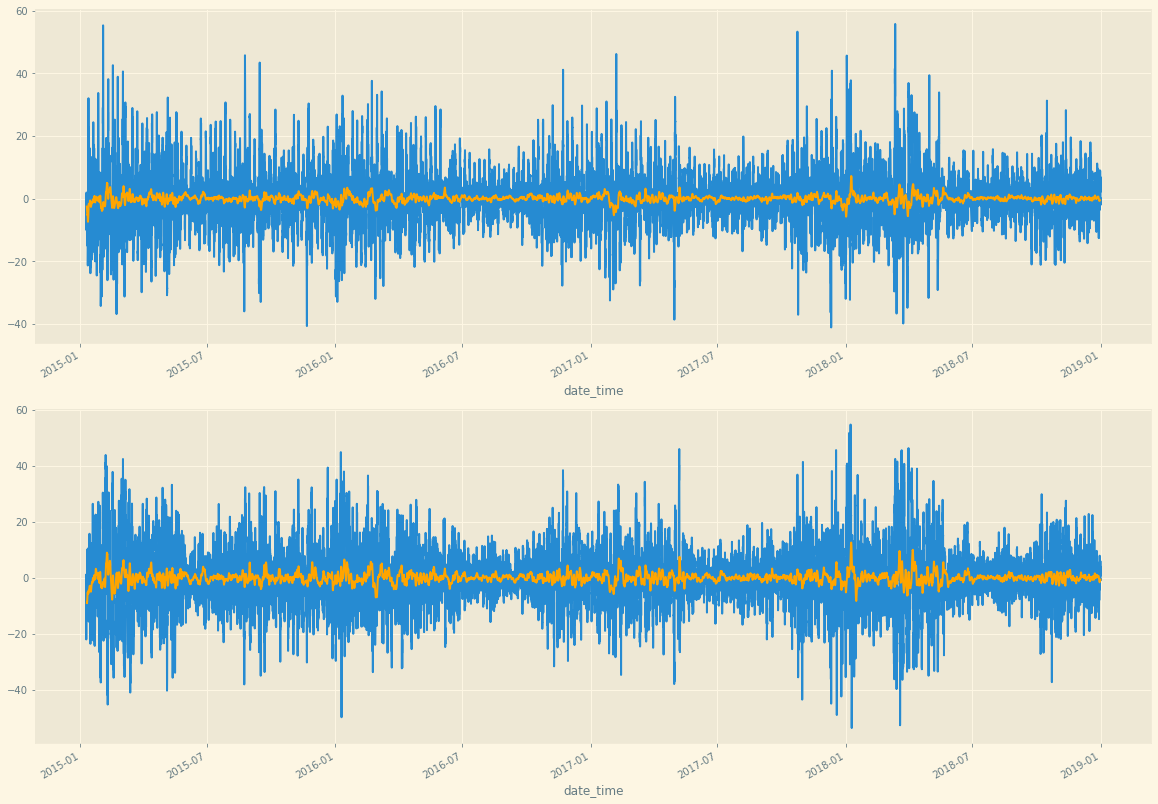

In [81]:
#Visualize deseasoned_price_actual
#Set figure
f, ax = plt.subplots(2,1,figsize = (20,15))

#Plot data
df['deseasoned_price'].plot(ax=ax[0])
df['deseasoned_price'].rolling(24*7,24).mean().plot(ax=ax[0], color = 'orange')


df['deseasoned_price2'].plot(ax=ax[1])
df['deseasoned_price2'].rolling(24*7,24).mean().plot(ax=ax[1], color = 'orange')


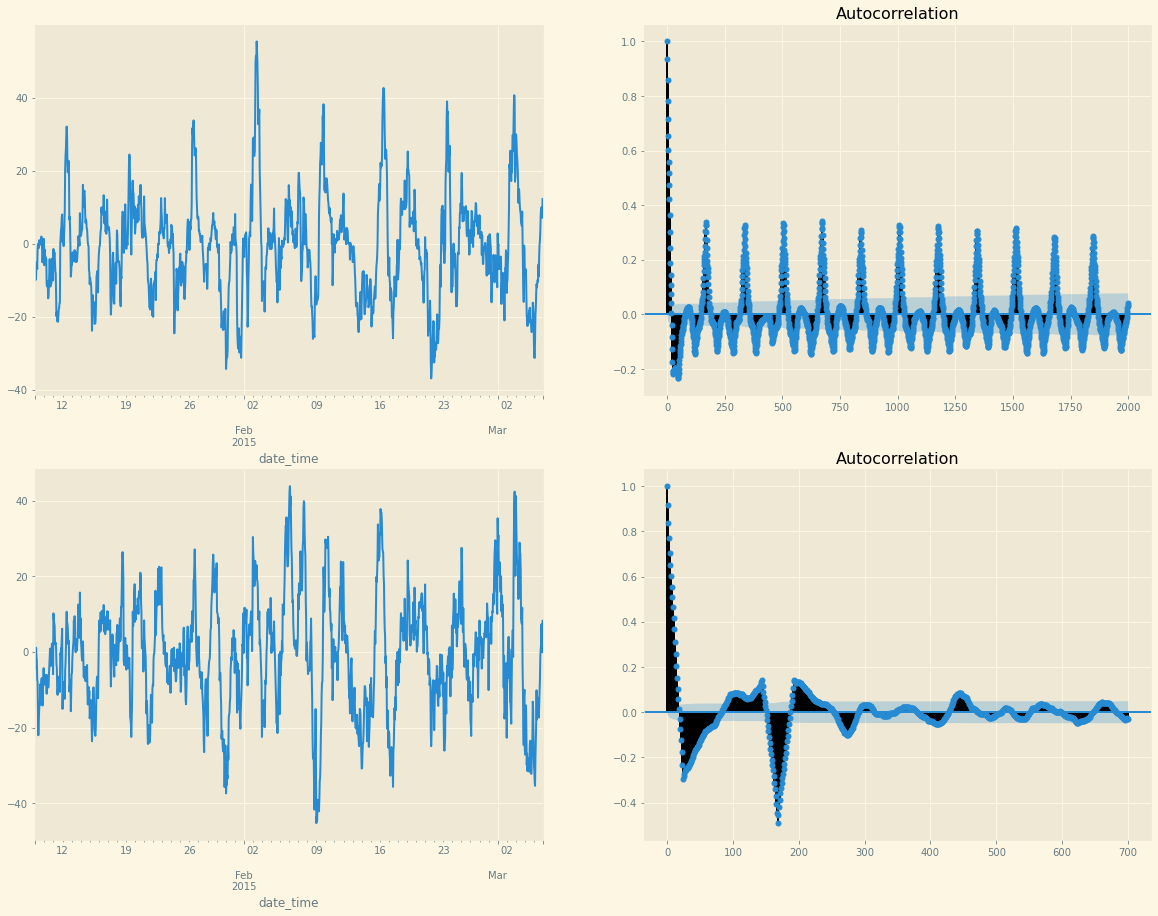

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


#Visualize deseasoned_price_actual
#Set figure
f, ax = plt.subplots(2,2,figsize = (20,15))

#Plot data
df['deseasoned_price'][:24*7*8].plot(ax=ax[0,0])
df['deseasoned_price2'][:24*7*8].plot(ax=ax[1,0])

plot_acf(df['deseasoned_price'], lags = 2000, ax=ax[0,1])
plot_acf(df['deseasoned_price2'], lags = 700, ax=ax[1,1]);

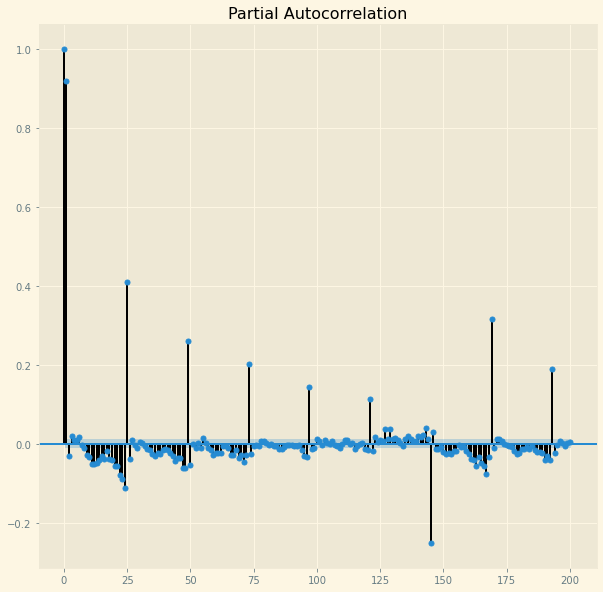

In [78]:
#Visualize deseasoned_price_actual
#Set figure
f, ax = plt.subplots(figsize = (10,10))

plot_pacf(df.deseasoned_price2, lags = 200, ax=ax);

### Test for stationarity

**Test Price Data**

*Deseasoned temperature data*

In [58]:
#Read in stats
from StationarityTests import ADF_KPSS_test, mean_var_test
#Test deseasoned_load_actual
ADF_KPSS_test(df.deseasoned_price2, 24*7)

ADF Statistic: -30.312115526658033
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.0032422229842598623
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [59]:
#View metrics variance and mean stats
mean_var_test(df.deseasoned_price2,24*7)

Mean1: 0.03305830836598293
Mean2: -0.009720557732196343
Var1: 94.09965978710486
Var2: 88.10723143262878


## Split Data into training and test sets